Efficient Graph-Based Image **Segmentation**

In [ ]:
!pip install felzenszwalb-segmentation

  Preparing metadata (setup.py) ... done
  Created wheel for felzenszwalb-segmentation: filename=felzenszwalb_segmentation-0.1.1-py3-none-any.whl size=4375 sha256=a772d6abfdfa8dd6814c5494954882b36606e8b4c45bbacb86bbca4befa7c3d9
  Stored in directory: /root/.cache/pip/wheels/ac/7a/b0/d2397dd0a5a585204014635b9488730bde68543256a9a8df7d
Successfully built felzenszwalb-segmentation


In [ ]:
import numpy as np
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from felzenszwalb_segmentation import segment
import pandasas pd

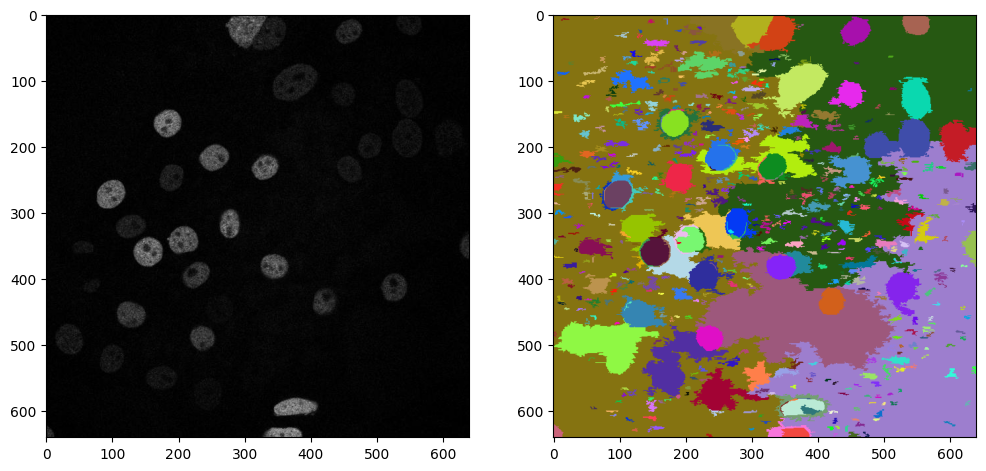

In [ ]:
image_files = glob('/content/im-94-_png.rf.2468f6a4922d613fe94c960cf81ee8a0.jpg')
len(image_files)

image = np.array(Image.open(image_files[0]))
segmented_image = segment(image, 0.70, 100 , 20)
fig = plt.figure(figsize=(12, 12))
a = fig.add_subplot(1, 2, 1)
plt.imshow(image)
a = fig.add_subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.show()



In [ ]:
import numpy as np
from copy import copy

def get_regions_dictionary(img):
    # Input img: (height, width, 4) with the 4th channel being the label channel
    # Only the L (label) channel is used in this method

    # Initialize the dictionary to hold the regions
    Regions = {}
    # Loop through each pixel in the image
    for y in range(img.shape[0]):  # get y axis
        for x in range(img.shape[1]):  # get x axis
            # Get the label for the current pixel
            l = img[y, x]  # Assuming l is a scalar label, not an array

            # If the label is not in the Regions dictionary, add it
            if l not in Regions:
                Regions[l] = {"min_x": x, "min_y": y, "max_x": x, "max_y": y, "labels": [l]}
            else:
                # Update the region's bounding box
                region = Regions[l]
                region["min_x"] = min(region["min_x"], x)
                region["min_y"] = min(region["min_y"], y)
                region["max_x"] = max(region["max_x"], x)
                region["max_y"] = max(region["max_y"], y)

    # Remove regions where the bounding box has zero area
    Regions = {key: value for key, value in Regions.items() if value["max_x"] > value["min_x"] and value["max_y"] > value["min_y"]}

    return Regions

# Example usage:
# Make sure the segmented_image has a 4th channel that contains the label information
# segmented_image = ...  # This should be the image with the segmentation labels
Regions = get_regions_dictionary(segmented_image[:,:,2])  # Pass only the label channel to the function
print(f"Regions found: {len(Regions)}")




Regions found: 256


/usr/local/lib/python3.10/dist-packages/felzenszwalb_segmentation/utils/filter_utils.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  src[y, max(x - i, 0)] + src[y, min(x + i, width - 1)])


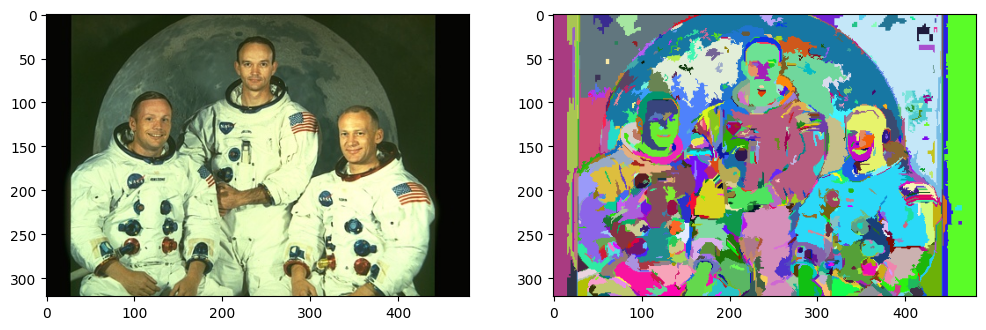

In [ ]:


image = np.array(Image.open(image_files[0]))
segmented_image = segment(image, 0.4, 20 , 10)
fig = plt.figure(figsize=(12, 12))
a = fig.add_subplot(1, 2, 1)
plt.imshow(image)
a = fig.add_subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.show()



Compte les zones dans l'image


In [ ]:

def get_regions_dictionary(img):
    # Input img: (height, width, 4) with the 4th channel being the label channel
    # Only the L (label) channel is used in this method

    # Initialize the dictionary to hold the regions
    Regions = {}
    # Loop through each pixel in the image
    for y in range(img.shape[0]):  # get y axis
        for x in range(img.shape[1]):  # get x axis
            # Get the label for the current pixel
            l = img[y, x]  # Assuming l is a scalar label, not an array

            # If the label is not in the Regions dictionary, add it
            if l not in Regions:
                Regions[l] = {"min_x": x, "min_y": y, "max_x": x, "max_y": y, "labels": [l]}
            else:
                # Update the region's bounding box
                region = Regions[l]
                region["min_x"] = min(region["min_x"], x)
                region["min_y"] = min(region["min_y"], y)
                region["max_x"] = max(region["max_x"], x)
                region["max_y"] = max(region["max_y"], y)

    # Remove regions where the bounding box has zero area
    Regions = {key: value for key, value in Regions.items() if value["max_x"] > value["min_x"] and value["max_y"] > value["min_y"]}

    return Regions


Regions = get_regions_dictionary(segmented_image[:,:,2])  # Pass only the label channel to the function
print(f"Regions found: {len(Regions)}")




In [ ]:
import pandas as pd


filename = "BigTree_jpg.rf.c2686b7cb9be97c4c97315dbfb283e12.jpg"


data_for_df = []
for label, attributes in Regions.items():
    row = {
        'filename': filename,
        'width': 640,  # ou la largeur réelle de votre image
        'height': 640,  # ou la hauteur réelle de votre image
        'class': attributes['labels'][0] if attributes['labels'] else 'unknown',
        'xmin': attributes['min_x'],
        'ymin': attributes['min_y'],
        'xmax': attributes['max_x'],
        'ymax': attributes['max_y']
    }
    data_for_df.append(row)
df = pd.DataFrame(data_for_df)
print(df)
df.to_csv('rregions.csv', index=False)


                                            filename  width  height  class  \
0  BigTree_jpg.rf.c2686b7cb9be97c4c97315dbfb283e1...    640     640  199.0   
1  BigTree_jpg.rf.c2686b7cb9be97c4c97315dbfb283e1...    640     640  141.0   
2  BigTree_jpg.rf.c2686b7cb9be97c4c97315dbfb283e1...    640     640  114.0   
3  BigTree_jpg.rf.c2686b7cb9be97c4c97315dbfb283e1...    640     640   92.0   
4  BigTree_jpg.rf.c2686b7cb9be97c4c97315dbfb283e1...    640     640   62.0   

   xmin  ymin  xmax  ymax  
0     0     0   670   433  
1   639     0  1023   158  
2     0    15  1023   481  
3   687   140  1023   432  
4     0   431    91   432  


Next step is add labels to segmentet regions of image

In [ ]:

from copy import copy
def get_regions_dictionary(img):
    # Input img: (height, width, 4) with the 4th channel being the label channel
    # Only the L (label) channel is used in this method

    # Initialize the dictionary to hold the regions
    Regions = {}
    # Loop through each pixel in the image
    for y in range(img.shape[0]):  # get y axis
        for x in range(img.shape[1]):  # get x axis
            # Get the label for the current pixel
            l = img[y, x]  # Assuming l is a scalar label, not an array

            # If the label is not in the Regions dictionary, add it
            if l not in Regions:
                Regions[l] = {"min_x": x, "min_y": y, "max_x": x, "max_y": y, "labels": [l]}
            else:
                # Update the region's bounding box
                region = Regions[l]
                region["min_x"] = min(region["min_x"], x)
                region["min_y"] = min(region["min_y"], y)
                region["max_x"] = max(region["max_x"], x)
                region["max_y"] = max(region["max_y"], y)

    # Remove regions where the bounding box has zero area
    Regions = {key: value for key, value in Regions.items() if value["max_x"] > value["min_x"] and value["max_y"] > value["min_y"]}

    return Regions

# Example usage:
# Make sure the segmented_image has a 4th channel that contains the label information
# segmented_image = ...  # This should be the image with the segmentation labels
Regions = get_regions_dictionary(segmented_image[:,:,2])  # Pass only the label channel to the function
print(f"Regions found: {len(Regions)}")




Regions found: 249


In [ ]:

df_regions = pd.DataFrame.from_dict(Regions, orient='index')
df_regions.reset_index(inplace=True)
df_regions.rename(columns={'index': 'label'}, inplace=True)

print(df_regions)
csv_file_path = 'regions.csv'  # Nom du fichier CSV
df_regions.to_csv(csv_file_path, index=False)


    label  min_x  min_y  max_x  max_y   labels
0   125.0      0      0    670    433  [125.0]
1   228.0    639      0   1023    158  [228.0]
2   245.0    247     15    936    440  [245.0]
3   216.0    687    140   1023    432  [216.0]
4    21.0      0    431     92    432   [21.0]
5   163.0    581    431   1023    481  [163.0]
6    12.0      0    433    822    481   [12.0]
7   184.0     77    433    187    435  [184.0]
8    63.0    698    439    739    443   [63.0]
9    39.0    869    457    895    475   [39.0]
10   37.0    833    460    859    469   [37.0]
11  202.0    787    462    832    473  [202.0]
12   92.0    893    466    976    481   [92.0]
13  166.0    821    467    880    481  [166.0]
14  253.0    976    472   1020    481  [253.0]


Seuil: 0.4, Taille Min: 10.0, Nombre de régions: 255
Seuil: 0.4, Taille Min: 17.5, Nombre de régions: 254
Seuil: 0.4, Taille Min: 25.0, Nombre de régions: 254
Seuil: 0.4, Taille Min: 32.5, Nombre de régions: 239
Seuil: 0.4, Taille Min: 40.0, Nombre de régions: 236
Seuil: 0.475, Taille Min: 10.0, Nombre de régions: 256
Seuil: 0.475, Taille Min: 17.5, Nombre de régions: 255
Seuil: 0.475, Taille Min: 25.0, Nombre de régions: 250
Seuil: 0.475, Taille Min: 32.5, Nombre de régions: 251
Seuil: 0.475, Taille Min: 40.0, Nombre de régions: 236
Seuil: 0.55, Taille Min: 10.0, Nombre de régions: 256
Seuil: 0.55, Taille Min: 17.5, Nombre de régions: 254
Seuil: 0.55, Taille Min: 25.0, Nombre de régions: 254
Seuil: 0.55, Taille Min: 32.5, Nombre de régions: 252
Seuil: 0.55, Taille Min: 40.0, Nombre de régions: 241
Seuil: 0.625, Taille Min: 10.0, Nombre de régions: 256
Seuil: 0.625, Taille Min: 17.5, Nombre de régions: 255
Seuil: 0.625, Taille Min: 25.0, Nombre de régions: 254
Seuil: 0.625, Taille Min:

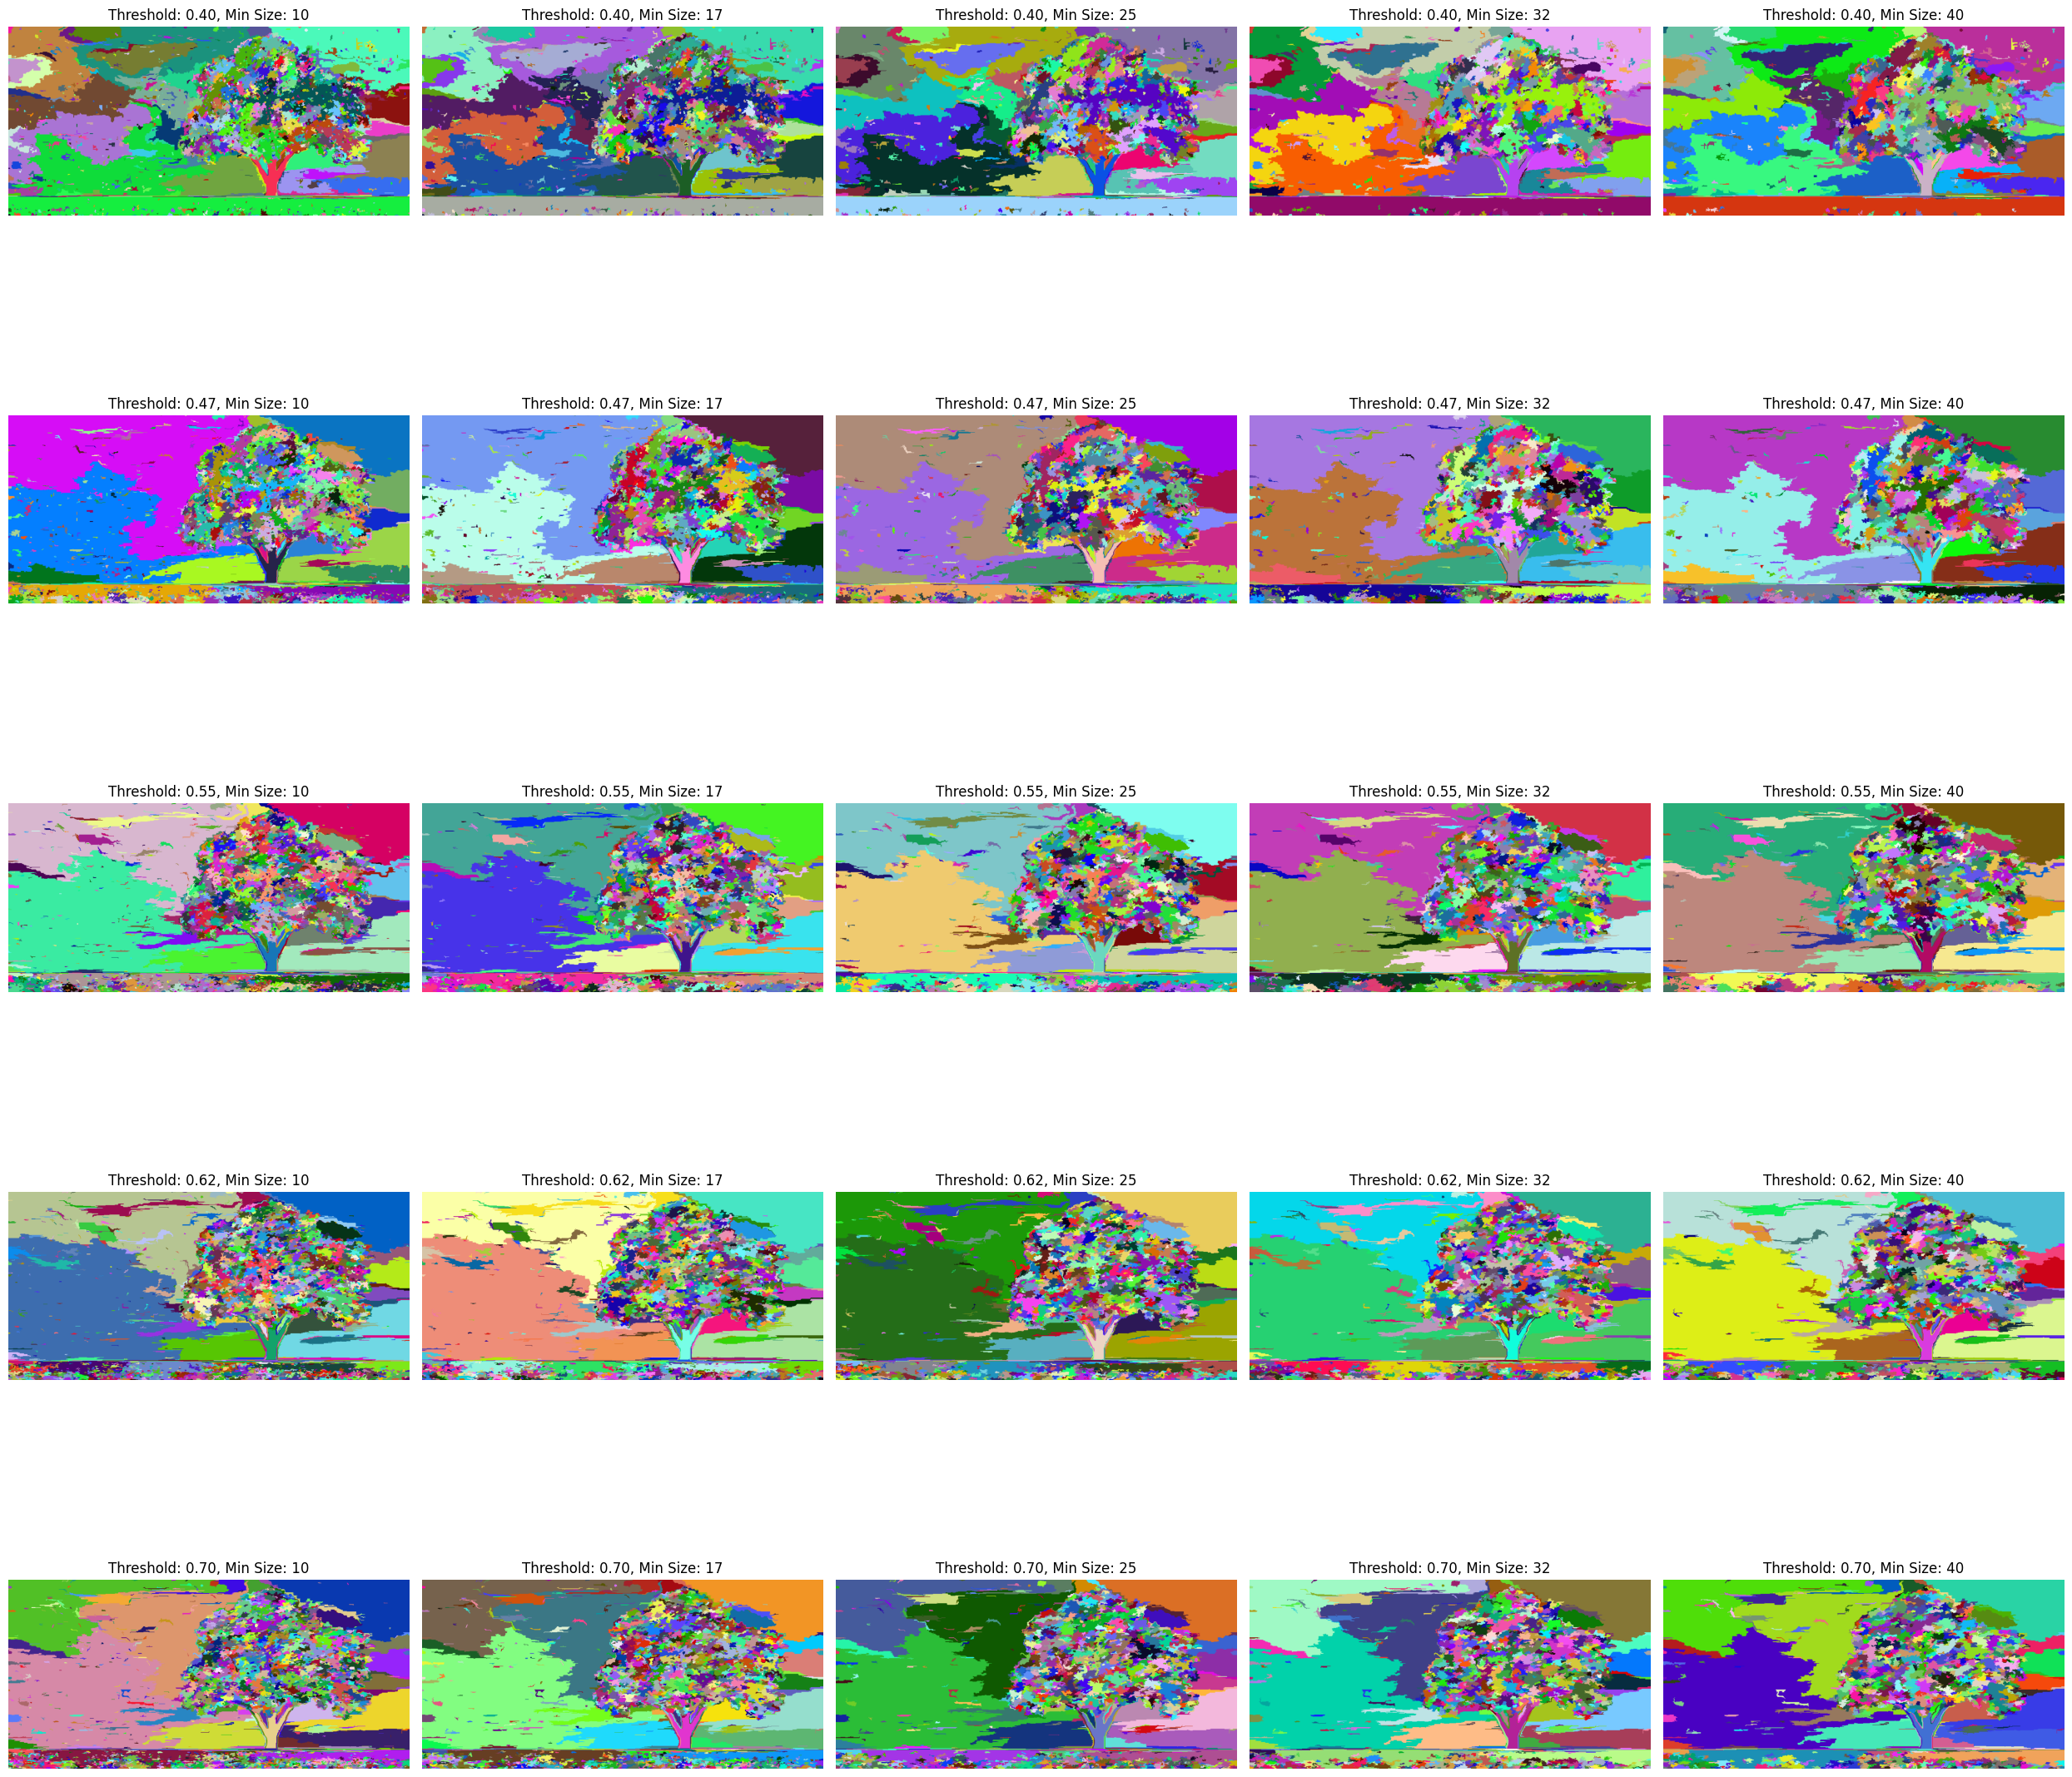

    Seuil  Taille Min  Nombre de régions
0   0.400        10.0                255
1   0.400        17.5                254
2   0.400        25.0                254
3   0.400        32.5                239
4   0.400        40.0                236
5   0.475        10.0                256
6   0.475        17.5                255
7   0.475        25.0                250
8   0.475        32.5                251
9   0.475        40.0                236
10  0.550        10.0                256
11  0.550        17.5                254
12  0.550        25.0                254
13  0.550        32.5                252
14  0.550        40.0                241
15  0.625        10.0                256
16  0.625        17.5                255
17  0.625        25.0                254
18  0.625        32.5                247
19  0.625        40.0                247
20  0.700        10.0                256
21  0.700        17.5                256
22  0.700        25.0                254
23  0.700       

In [ ]:

from PIL import Image


results = []
image_path = '/content/BigTree (1).jpg'
image = np.array(Image.open(image_path))


threshold_values = np.linspace(0.4, 0.70, 5)
min_size_values = np.linspace(10, 40, 5)

fig, axes = plt.subplots(5, 5, figsize=(25, 25))
for i, threshold in enumerate(threshold_values):
    for j, min_size in enumerate(min_size_values):
        segmented_image = segment(image, threshold, 30, int(min_size))
        ax = axes[i, j]
        ax.imshow(segmented_image.astype(np.uint8))
        ax.set_title(f"Threshold: {threshold:.2f}, Min Size: {int(min_size)}")
        ax.axis('off')

        Regions = get_regions_dictionary(segmented_image[:,:,2])  # Cette fonction doit être définie correctement.
        num_regions = len(Regions)
        print(f'Seuil: {threshold}, Taille Min: {min_size}, Nombre de régions: {num_regions}')


        result = {'Seuil': threshold, 'Taille Min': min_size, 'Nombre de régions': num_regions}
        results.append(result)

plt.tight_layout()
plt.show()
df = pd.DataFrame(results)
print(df)
df.to_csv('segmentation_results.csv', index=False)


In [ ]:
pip install seaborn


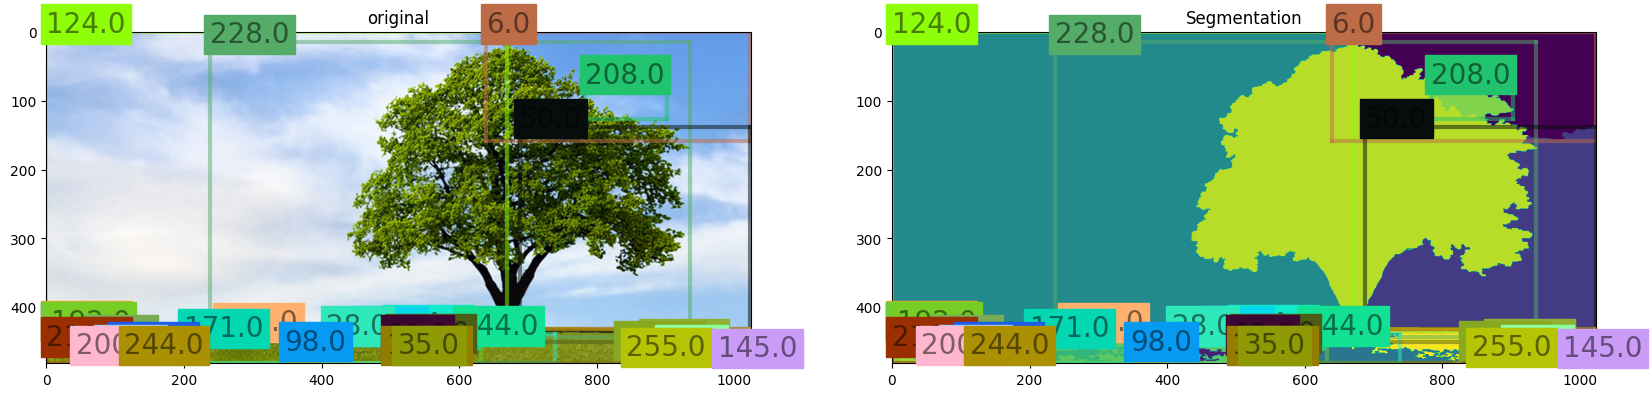

In [ ]:
import seaborn as sns
import seaborn as sns

figure = plt.figure(figsize=(20, 40))


ax = figure.add_subplot(1, 2, 1)
ax.imshow(image[:, :, :3] / 2**8)
ax.set_title("original")

for item, color in zip(Regions.values(), sns.xkcd_rgb.values()):
    x1 = item["min_x"]
    y1 = item["min_y"]
    x2 = item["max_x"]
    y2 = item["max_y"]
    label = item["labels"][0]
    plt_rectangle(plt, label, x1, y1, x2, y2, color=color)


ax = figure.add_subplot(1, 2, 2)
ax.imshow(segmented_image[:, :, 2])
ax.set_title("Segmentation")
for item, color in zip(Regions.values(), sns.xkcd_rgb.values()):
    x1 = item["min_x"]
    y1 = item["min_y"]
    x2 = item["max_x"]
    y2 = item["max_y"]
    label = item["labels"][0]
    plt_rectangle(plt, label, x1, y1, x2, y2, color=color)

plt.show()


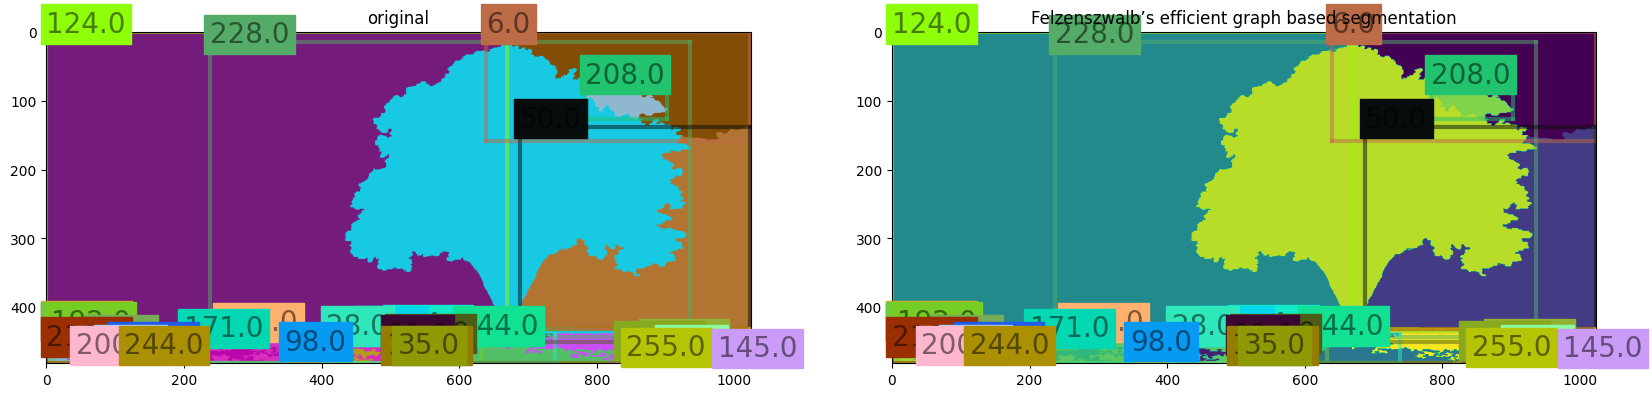

In [ ]:
def plt_rectangle(plt,label,x1,y1,x2,y2,color = "yellow", alpha=0.5):
    linewidth = 3
    if type(label) == list:
        linewidth = len(label)*3 + 2
        label = ""

    plt.text(x1,y1,label,fontsize=20,backgroundcolor=color,alpha=alpha)
    plt.plot([x1,x1],[y1,y2], linewidth=linewidth,color=color, alpha=alpha)
    plt.plot([x2,x2],[y1,y2], linewidth=linewidth,color=color, alpha=alpha)
    plt.plot([x1,x2],[y1,y1], linewidth=linewidth,color=color, alpha=alpha)
    plt.plot([x1,x2],[y2,y2], linewidth=linewidth,color=color, alpha=alpha)

figure = plt.figure(figsize=(20,40))
ax = figure.add_subplot(1,2,1)
ax.imshow(segmented_image[:,:,:3]/2**8)
ax.set_title("original")
for item, color in zip(Regions.values(),sns.xkcd_rgb.values()):
    x1 = item["min_x"]
    y1 = item["min_y"]
    x2 = item["max_x"]
    y2 = item["max_y"]
    label = item["labels"][0]
    plt_rectangle(plt,label,x1,y1,x2,y2,color=color)


ax = figure.add_subplot(1,2,2)
ax.imshow(segmented_image[:,:,2])
ax.set_title("Felzenszwalb’s efficient graph based segmentation".format(len(np.unique(segmented_image[:,:,2]))))

for item, color in zip(Regions.values(),sns.xkcd_rgb.values()):
    x1 = item["min_x"]
    y1 = item["min_y"]
    x2 = item["max_x"]
    y2 = item["max_y"]
    label = item["labels"][0]
    plt_rectangle(plt,label,x1,y1,x2,y2,color=color)
plt.show()

In [ ]:
#calculate the sum of histogram intersection of texture
def simularity_of_texture(r1, r2):
    return sum([min(a, b) for a, b in zip(r1["hist_t"], r2["hist_t"])])

#calculate the size similarity over the image
def simularity_of_size(r1, r2, imsize):
    return 1.0 - (r1["size"] + r2["size"]) / imsize

#calculate the fill similarity over the image
def simularity_of_fill(r1, r2, imsize):
    bbsize = (
        (max(r1["max_x"], r2["max_x"]) - min(r1["min_x"], r2["min_x"]))
        * (max(r1["max_y"], r2["max_y"]) - min(r1["min_y"], r2["min_y"]))
    )
    return 1.0 - (bbsize - r1["size"] - r2["size"]) / imsize

#return sum of simularity of two regions
def calculate_sum_sim(r1, r2, imsize):
    return (simularity_of_colour(r1, r2)       +\
            simularity_of_texture(r1, r2)      +\
            simularity_of_size(r1, r2, imsize) +\
            simularity_of_fill(r1, r2, imsize))

#calculate simularity of all regions
def calculate_similarlity(img,neighbours,verbose=False):
    imsize = img.shape[0] * img.shape[1]
    Simularity = {}
    for (ai, ar), (bi, br) in neighbours:
        Simularity[(ai, bi)] = calculate_sum_sim(ar, br, imsize)
        if verbose:
            print("S[({:2.0f}, {:2.0f})]={:3.2f}".format(ai,bi,Simularity[(ai, bi)]))
    return(Simularity)
print("S[(Pair of the intersecting regions)] = Similarity index")
Simularity = calculate_similarlity(img,neighbours,verbose=True)